 # Exploratory analysis

In [27]:
import math
import random
from datetime import datetime
import skimage.io as skd
import os
import numpy as np
import matplotlib.pyplot as plt

### Function to load data from a given data path
#### It expects the data to be already sorted out in their corresponding class folders

In [28]:
def load_data(data_path):
    print('Analysis - Loading data from path [{}]'.format(data_path))
    dirs = [x for x in os.listdir(data_path)
            if os.path.isdir(os.path.join(data_path, x))]
    lab, im = [], []
    for d in dirs:
        label_dir = os.path.join(data_path, d)
        files = [os.path.join(label_dir, f)
                 for f in os.listdir(label_dir)
                 if os.path.isfile(os.path.join(label_dir, f))
                 and f.endswith('.jpg')]
        for f in files:
            im.append(skd.imread(f))
            lab.append(int(d))
    print('Analysis - Loaded {} images and {} different classes'.format(
        len(im), len(set(lab))))
    return im, lab

### Function that prints a summary of the data loaded
#### It will provide information like shape of the dataset, dimension, total bytes it uses, flags...

In [29]:
def data_summary(np_data, flags=True):
    summary = 'Analysis - Data Summary [Np_Dim: {0}, Np_Bytes: {1}, ' \
              'Np_ItemSize: {2}, Shape: {3}]'.format(np_data.ndim,
                                                     np_data.nbytes,
                                                     np_data.itemsize,
                                                     np_data.shape)
    print(summary)
    if flags:
        print('Analysis - Data Flags [{}]'.format(
            str(np_data.flags).replace('\n', '')))

###  Function that shows a histogram regarding to data distribution by classes

In [42]:
def show_data_distribution(labels):
    unique_labels = set(labels)
    print('Analysis - Showing data distribution histogram: {} items and '
             ' {} unique classes were found'.format(len(labels),
                                                    len(unique_labels)))

    fig, ax = plt.subplots()
    ax.hist(labels, len(unique_labels))
    ax.set_title('Data Distribution')

### Function that shows a sample of the data loaded
#### This is just to verify that data has been loaded properly. Number of rows and columns of the figure will be passed as argument. Images displayed will be chosen randomly in each execution

In [44]:
def show_sample(images, nrows, ncols):
    print('Analysis - Showing a sample of images: {} rows x {} cols'
             ''.format(nrows, ncols))
    rand_images = random.sample(range(0, len(images)), nrows * ncols)
    fig, axs = plt.subplots(nrows, ncols)
    fig.set_size_inches(16, 16)
    for i in range(len(rand_images)):
        axs[i].imshow(images[rand_images[i]])
        axs[i].set_title('Example {}'.format(i + 1))
        axs[i].set_axis_off()

### Function that shows a sample of the data, with 1 image per class
#### It will display a randomly chosen image for each class

In [45]:
def show_sample_by_classes(images, labels):
    unique_labels = set(labels)
    print('Analysis - Showing a sample of images by ALL classes:'
             ' {} unique classes were found'.format(len(unique_labels)))
    ncols = 10
    nrows = math.ceil(len(unique_labels) / ncols)
    fig, axs = plt.subplots(nrows, ncols)
    [axi.set_axis_off() for axi in axs.ravel()]
    fig.set_size_inches(16, 16)
    i, j = 0, 0
    for label in unique_labels:
        temp_im = images[labels.index(label)]
        row = i % nrows
        col = j % ncols
        axs[row, col].imshow(temp_im)
        axs[row, col].set_title(
            'Class {}, {}'.format(label, labels.count(label)))
        # axs[row, col].set_axis_off()
        j += 1
        i = i if j % ncols != 0 else i + 1

In [32]:
ims, labs = load_data('/home/ruben/workspace/uc3m/tfg/deep-learning-facial-recognition/data/age')

Analysis - Loading data from path [/home/ruben/workspace/uc3m/tfg/deep-learning-facial-recognition/data/age]
Analysis - Loaded 23704 images and 104 different classes


In [34]:
data_summary(np.array(ims))

Analysis - Data Summary [Np_Dim: 4, Np_Bytes: 2844480000, Np_ItemSize: 1, Shape: (23704, 200, 200, 3)]
Analysis - Data Flags [  C_CONTIGUOUS : True  F_CONTIGUOUS : False  OWNDATA : True  WRITEABLE : True  ALIGNED : True  WRITEBACKIFCOPY : False  UPDATEIFCOPY : False]


In [35]:
data_summary(np.array(labs))

Analysis - Data Summary [Np_Dim: 1, Np_Bytes: 189632, Np_ItemSize: 8, Shape: (23704,)]
Analysis - Data Flags [  C_CONTIGUOUS : True  F_CONTIGUOUS : True  OWNDATA : True  WRITEABLE : True  ALIGNED : True  WRITEBACKIFCOPY : False  UPDATEIFCOPY : False]


Analysis - Showing data distribution histogram: 23704 items and  104 unique classes were found


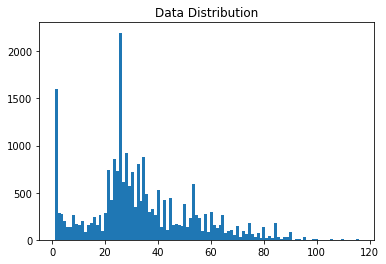

In [43]:
show_data_distribution(labs)

Analysis - Showing a sample of images: 1 rows x 8 cols


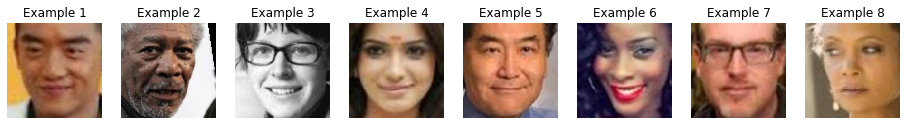

In [46]:
show_sample(ims, 1, 8)

Analysis - Showing a sample of images by ALL classes: 104 unique classes were found


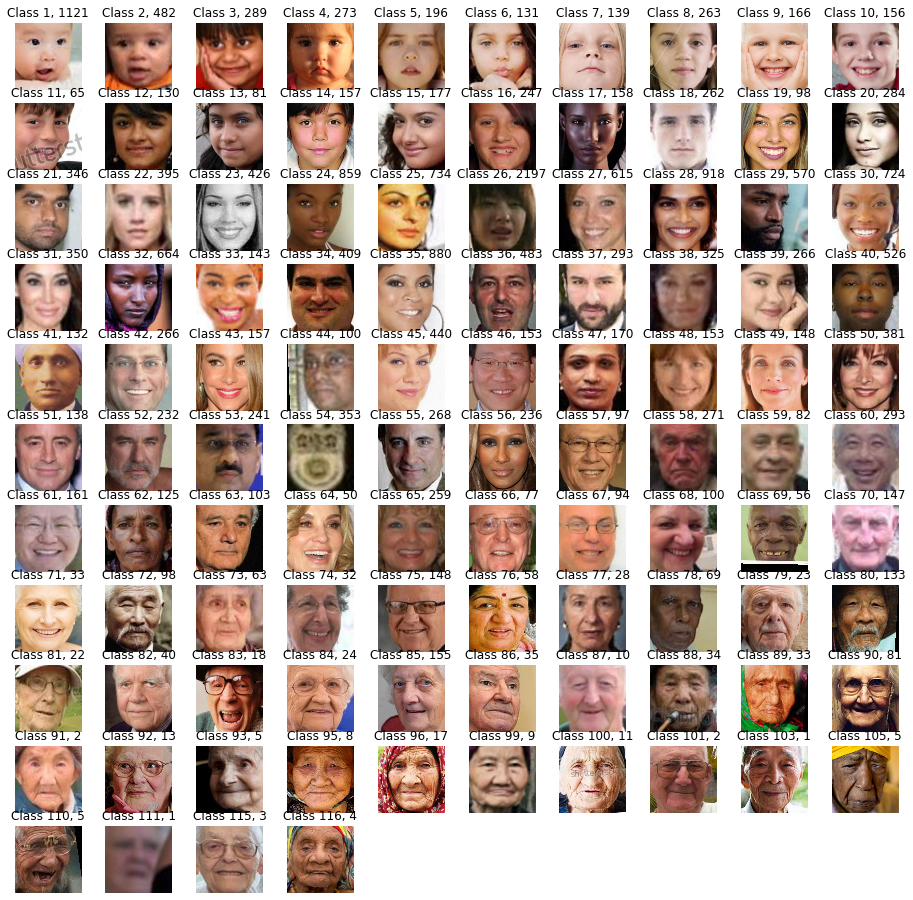

In [51]:
show_sample_by_classes(ims, labs)

In [48]:
plt.close('all')